# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

I am interested in this web scrapping capstone project because it provides an opportunity to gather valuable data from website. By scrapping data from the web, I can extract and analyze information directly from various sources. In this project I will analyze the inflation trends over a specific period by scrapping data from the website 'https://pusatdata.kontan.co.id/makroekonomi/inflasi' to gain insight into inflation trends during the period from July 31, 2020, to August 31, 2024, I aim to identify the months and years with the highest and lowest inflation rates and compare the statistical data analyzed on a month-over-month (MoM) and year-over-year (YoY) basis & make the conclusion. To visualize these insights, I will use a grouped bar chart that compares the average, maximum, minimum, and median inflation rates for both MoM and YoY across each year within the specified period.

Step-by-Step Plan:
1. Send an HTTP Request: Use the requests library to fetch the webpage.
2. Parse the HTML: Use BeautifulSoup to parse the HTML content and locate the relevant data.
3. Extract the Data: Identify the table or tags that contain the inflation data and extract it into a structured format.
4. Create a DataFrame: Convert the extracted data into a pandas DataFrame.
5. Data Wrangling: Clean and prepare the data for visualization.
6. Visualize the Data: Use matplotlib to plot the data.
7. Analyze the Data and make a conclusion.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [157]:
#1. Install Required Libraries and send a GET request to the webpage, then check if the request was successful.
# If respon status code == 200, means the request is successful!
import requests

url_get = requests.get('https://pusatdata.kontan.co.id/makroekonomi/inflasi')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [158]:
url_get.content[1:500]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="shortcut icon" href="//assets.kontan.co.id/favicon.ico"/>\n    <link rel="stylesheet" href="https://asset.kontan.co.id/general/third-party/font-awesome-4.7.0/css/fo'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [159]:
#2. Import the Libraries
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [160]:
print(soup.prettify()[1:500])

!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="//assets.kontan.co.id/favicon.ico" rel="shortcut icon"/>
  <link href="https://asset.kontan.co.id/general/third-party/font-awesome-4.7.0/css/font-awesome.min.css" rel=


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*(to extract the desired information from a webpage, we need to understand its underlying HTML structure. The .find() method in BeautifulSoup is used to search for specific HTML elements/tags that contain the data we want, but to make it effective, we need to know the exact tags/classes/IDs associated with that data. The .preetify( method in BeautifulSoap helps us format the raw HTML content in a more readable and indented way for easier navigation, efficient data extraction, etc. by combining .prettify() with -find(), we can efficiently locate and extract the necessary information from any webpage)*

In [161]:
table = soup.find('div', attrs= {'class':'baris-scroll'})
print(table.prettify()[1:500])

div class="baris-scroll">
 <div class="tabel-body">
  <div class="kol-konten3-1">
   31/08/2024
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,03
   </div>
  </div>
  <div class="kol-konten3-3">
   <div class="w-30-px txtright center-max">
    2,12
   </div>
  </div>
 </div>
 <div class="tabel-body">
  <div class="kol-konten3-1">
   31/07/2024
  </div>
  <div class="kol-konten3-2">
   <div class="w-30-px txtright center-max">
    0,18
   </div>
  </div


In [162]:
table.find_all('div', attrs={'class':'kol-konten3-1'})[:5]

[<div class="kol-konten3-1">31/08/2024</div>,
 <div class="kol-konten3-1">31/07/2024</div>,
 <div class="kol-konten3-1">30/06/2024</div>,
 <div class="kol-konten3-1">31/05/2024</div>,
 <div class="kol-konten3-1">30/04/2024</div>]

Next, we need to find the row length.

In [163]:
row = table.find_all('div', attrs={'class':'kol-konten3-1'})
row_length = len(row)
row_length

50

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

> To perform the web scraping proces, you can use a 'for' loop in combination with BeautifulSoup to iterate over multiple elements on a webpage.

> This specific approach we use will depend on the structure of the HTML and the information we want to extract with automatic process.

> By using 'for' loop, we can efficiently scrape multiple pieces of information from a webpage in a structured and repeatable manner.

In [164]:
temp = []  # Initiating a tuple

for i in range(0, row_length):

    #get period
    period = table.find_all('div', attrs={'class':'kol-konten3-1'})[i].text

    #get inflation mom
    inflation_mom = table.find_all('div', attrs={'class':'kol-konten3-2'})[i].text
    inflation_mom = inflation_mom.strip() #to remove excess white space

    #get inflation yoy
    inflation_yoy = table.find_all('div', attrs={'class':'kol-konten3-3'})[i].text
    inflation_yoy = inflation_yoy.strip() #to remove excess white space

    temp.append((period,inflation_mom,inflation_yoy))

    # Scraping process
    # You can add your scraping code here
    
temp

[('31/08/2024', '0,03', '2,12'),
 ('31/07/2024', '0,18', '2,13'),
 ('30/06/2024', '0,08', '2,51'),
 ('31/05/2024', '0,03', '2,84'),
 ('30/04/2024', '0,25', '3,00'),
 ('31/03/2024', '0,52', '3,05'),
 ('29/02/2024', '0,37', '2,75'),
 ('31/01/2024', '0,04', '2,57'),
 ('31/12/2023', '0,41', '2,61'),
 ('30/11/2023', '0,38', '2,86'),
 ('31/10/2023', '0,17', '2,56'),
 ('30/09/2023', '0,19', '2,28'),
 ('31/08/2023', '0,02', '3,27'),
 ('31/07/2023', '0,21', '3,08'),
 ('30/06/2023', '0.14', '3.52'),
 ('31/05/2023', '0.09', '4.00'),
 ('30/04/2023', '0,33', '4,33'),
 ('31/03/2023', '0.18', '4.97'),
 ('28/02/2023', '0,16', '5,47'),
 ('31/01/2023', '0,34', '5,28'),
 ('31/12/2022', '0,66', '5,51'),
 ('30/11/2022', '0,09', '5,42'),
 ('31/10/2022', '0,11', '5,71'),
 ('30/09/2022', '1,17', '5,95'),
 ('31/08/2022', '0,21', '4,69'),
 ('31/07/2022', '0,64', '4,94'),
 ('30/06/2022', '0.61', '4.35'),
 ('31/05/2022', '0,40', '3,55'),
 ('30/04/2022', '0,95', '3,47'),
 ('31/03/2022', '0.66', '2.64'),
 ('28/02/2

In [165]:
#to do a further analysis, we reverse this list
temp = temp[::-1]
temp

[('31/07/2020', '0.04', '1.54'),
 ('31/08/2020', '0.05', '1.32'),
 ('30/09/2020', '0,05', '1,42'),
 ('31/10/2020', '0,07', '1.44'),
 ('30/11/2020', '0,28', '1.59'),
 ('31/12/2020', '0,45', '1.68'),
 ('31/01/2021', '0,26', '1.55'),
 ('28/02/2021', '0,10', '1.38'),
 ('31/03/2021', '0,08', '1,37'),
 ('30/04/2021', '0,13', '1,42'),
 ('31/05/2021', '0,32', '1,68'),
 ('30/06/2021', '0,16', '1,33'),
 ('31/07/2021', '0,08', '1,52'),
 ('31/08/2021', '0,03', '1,59'),
 ('30/09/2021', '0,04', '1,60'),
 ('31/10/2021', '0,12', '1,66'),
 ('30/11/2021', '0,37', '1,75'),
 ('31/12/2021', '0,57', '1,87'),
 ('31/01/2022', '0,56', '2,18'),
 ('28/02/2022', '0,54', '2,06'),
 ('31/03/2022', '0.66', '2.64'),
 ('30/04/2022', '0,95', '3,47'),
 ('31/05/2022', '0,40', '3,55'),
 ('30/06/2022', '0.61', '4.35'),
 ('31/07/2022', '0,64', '4,94'),
 ('31/08/2022', '0,21', '4,69'),
 ('30/09/2022', '1,17', '5,95'),
 ('31/10/2022', '0,11', '5,71'),
 ('30/11/2022', '0,09', '5,42'),
 ('31/12/2022', '0,66', '5,51'),
 ('31/01/2

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [167]:
import pandas as pd

df = pd.DataFrame(temp, columns=('period','inflation_mom','inflation_yoy'))
df.head

<bound method NDFrame.head of         period inflation_mom inflation_yoy
0   31/07/2020          0.04          1.54
1   31/08/2020          0.05          1.32
2   30/09/2020          0,05          1,42
3   31/10/2020          0,07          1.44
4   30/11/2020          0,28          1.59
5   31/12/2020          0,45          1.68
6   31/01/2021          0,26          1.55
7   28/02/2021          0,10          1.38
8   31/03/2021          0,08          1,37
9   30/04/2021          0,13          1,42
10  31/05/2021          0,32          1,68
11  30/06/2021          0,16          1,33
12  31/07/2021          0,08          1,52
13  31/08/2021          0,03          1,59
14  30/09/2021          0,04          1,60
15  31/10/2021          0,12          1,66
16  30/11/2021          0,37          1,75
17  31/12/2021          0,57          1,87
18  31/01/2022          0,56          2,18
19  28/02/2022          0,54          2,06
20  31/03/2022          0.66          2.64
21  30/04/2022          

### Data Cleansing

(please change this markdown with your explanation of what you do for data wrangling)
> After extracting data from a webpage using web scraping, it's a common practice to organize it into a structured format like a DataFrame. DataFrames, especially those from the pandas library, are highly useful for data analysis and manipulation because they allow us to easily clean, transform, and analyze data.

> Data wrangling is the process of cleaning, transforming, and enriching the raw data into a more usable format. This might include handling missing values, removing duplicates, converting data types, normalizing data, and more.

> By putting the extracted data into a DataFrame and performing data wrangling, we ensure the data is clean, structured, and ready for further analysis or visualization. This helps improve the quality of insights we can draw from the data.

In [168]:
# Cek data types (sebelum di run, ini 'object' semua), karena run 2x setelah di covert,
# maka data types nya sudah berubah.
df.dtypes

period           object
inflation_mom    object
inflation_yoy    object
dtype: object

In [169]:
# converting data types
df['inflation_mom'] = df['inflation_mom'].str.replace(",",".")
df['inflation_mom'] = df['inflation_mom'].astype('float64')
df['inflation_yoy'] = df['inflation_yoy'].str.replace(",",".")
df['inflation_yoy'] = df['inflation_yoy'].astype('float64')
df['period'] = df['period'].astype('datetime64[ns]')

df.dtypes

period           datetime64[ns]
inflation_mom           float64
inflation_yoy           float64
dtype: object

### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)
> Data wrangling is a critical step before creating any data visualization. It involves preparing and transforming raw data into a clean, structured, and usable format. This ensured that visualization are accurate, meaningful, and easy to understand.

> Data wrangling for visualization involves preparing the to ensure it is clean, structured, and ready for analysis. This process enhances the quality and clarity of visualizations, leading to more meaningful insights.

In [170]:
#to make our plot behave like we want, so we need to set our index of our dataframe to our time column.
df = df.set_index('period')

<Axes: xlabel='period'>

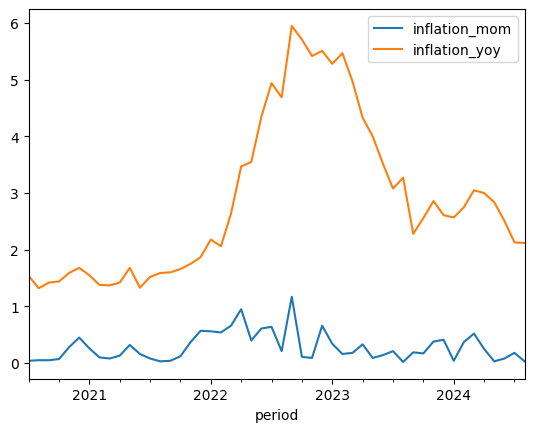

In [171]:
df.plot()

<Axes: title={'center': 'Inflation Rate MoM and YoY in Indonesia Year 2020-2024'}, xlabel='Periode'>

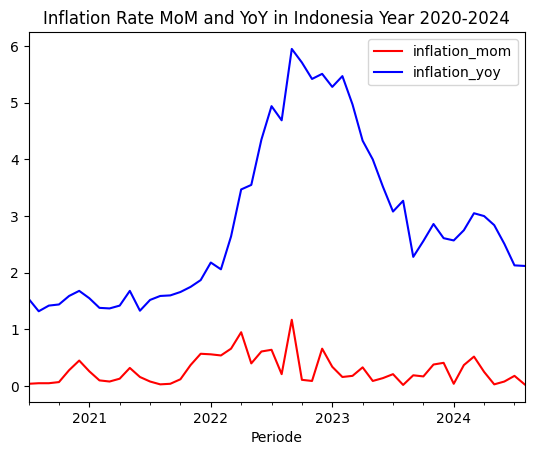

In [172]:
df.plot(title = 'Inflation Rate MoM and YoY in Indonesia Year 2020-2024',
                     color = ['red', 'blue'],
                     xlabel = 'Periode' )

In [173]:
df

,inflation_mom,inflation_yoy
period,,
2020-07-31,0.04,1.54
2020-08-31,0.05,1.32
2020-09-30,0.05,1.42
2020-10-31,0.07,1.44
2020-11-30,0.28,1.59
2020-12-31,0.45,1.68
2021-01-31,0.26,1.55
2021-02-28,0.10,1.38
2021-03-31,0.08,1.37


In [174]:
df.PeriodeKolom = df.reset_index() # Mengubah kolom Period dari index menjadi sebuah kolom
df.PeriodeKolom

/var/folders/84/3kp0c9kd2gzbl68lyvd84w780000gn/T/ipykernel_4138/1105120552.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.PeriodeKolom = df.reset_index() # Mengubah kolom Period dari index menjadi sebuah kolom


,period,inflation_mom,inflation_yoy
0,2020-07-31,0.04,1.54
1,2020-08-31,0.05,1.32
2,2020-09-30,0.05,1.42
3,2020-10-31,0.07,1.44
4,2020-11-30,0.28,1.59
5,2020-12-31,0.45,1.68
6,2021-01-31,0.26,1.55
7,2021-02-28,0.10,1.38
8,2021-03-31,0.08,1.37
9,2021-04-30,0.13,1.42


In [175]:
df.PeriodeKolom['period'].dt.to_period('Y') # Mengekstrak komponen Year dari kolom Date

0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2021
7     2021
8     2021
9     2021
10    2021
11    2021
12    2021
13    2021
14    2021
15    2021
16    2021
17    2021
18    2022
19    2022
20    2022
21    2022
22    2022
23    2022
24    2022
25    2022
26    2022
27    2022
28    2022
29    2022
30    2023
31    2023
32    2023
33    2023
34    2023
35    2023
36    2023
37    2023
38    2023
39    2023
40    2023
41    2023
42    2024
43    2024
44    2024
45    2024
46    2024
47    2024
48    2024
49    2024
Name: period, dtype: period[Y-DEC]

In [176]:
# buat kolom baru, Year, yang menunjukkan Year dari waktu yang diberikan 
df.PeriodeKolom['Year'] = df.PeriodeKolom['period'].dt.to_period('Y')
df.PeriodeKolom.head()

,period,inflation_mom,inflation_yoy,Year
0,2020-07-31,0.04,1.54,2020
1,2020-08-31,0.05,1.32,2020
2,2020-09-30,0.05,1.42,2020
3,2020-10-31,0.07,1.44,2020
4,2020-11-30,0.28,1.59,2020


inflation_mom       Axes(0.125,0.11;0.352273x0.77)
inflation_yoy    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

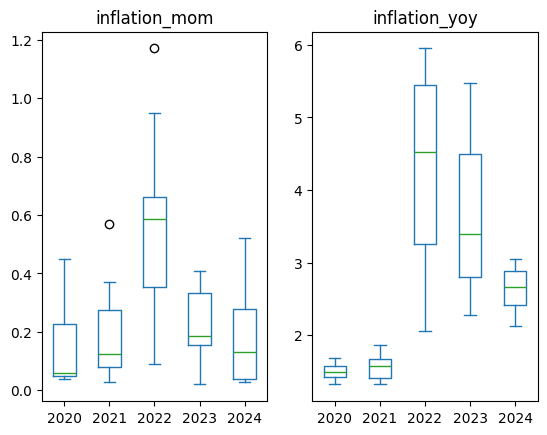

In [177]:
# visualisasi
df.PeriodeKolom.plot.box(by='Year')

In [178]:
df.describe()

,inflation_mom,inflation_yoy
count,50.000000,50.000000
mean,0.278400,2.867600
std,0.252703,1.414262
min,0.020000,1.320000
25%,0.082500,1.615000
50%,0.185000,2.565000
75%,0.395000,3.542500
max,1.170000,5.950000


In [181]:
#Group by year and calculate summary statistics

df_grouped = df.groupby(df.index.year).agg(
    average_mom=('inflation_mom', 'mean'),
    max_mom=('inflation_mom', 'max'),
    min_mom=('inflation_mom', 'min'),
    median_mom=('inflation_mom', 'median')
)

# Display the table
print(df_grouped)

        average_mom  max_mom  min_mom  median_mom
period                                           
2020       0.156667     0.45     0.04       0.060
2021       0.188333     0.57     0.03       0.125
2022       0.550000     1.17     0.09       0.585
2023       0.218333     0.41     0.02       0.185
2024       0.187500     0.52     0.03       0.130


In [105]:
df_2023= df.loc['2023-01-01':'2023-12-31'].copy()
df_2023.describe()

,inflation_mom,inflation_yoy
count,12.000000,12.000000
mean,0.218333,3.685833
std,0.120667,1.109385
min,0.020000,2.280000
25%,0.155000,2.797500
50%,0.185000,3.395000
75%,0.332500,4.490000
max,0.410000,5.470000


In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# Filter data by year
df_2020 = df.loc['2020']
df_2021 = df.loc['2021']
df_2022 = df.loc['2022']
df_2023 = df.loc['2023']
df_2024 = df.loc['2024']

In [81]:
Inflation_Rate = {
    'df_2020': df_2020,
    'df_2021': df_2021,
    'df_2022': df_2022,
    'df_2023': df_2023,
    'df_2024': df_2024
}

<function matplotlib.pyplot.show(close=None, block=None)>

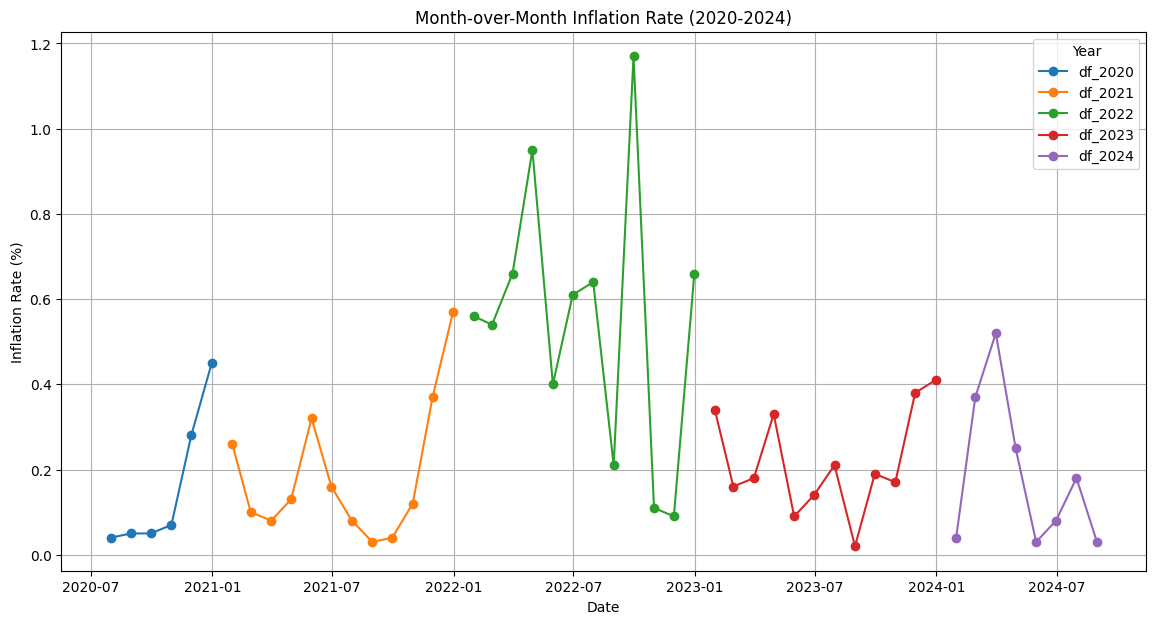

In [91]:
# Plotting
plt.figure(figsize=(14, 7))

for year, data in Inflation_Rate.items():
    plt.plot(data.index, data['inflation_mom'], marker='o', linestyle='-', label=f'{year}')

plt.title('Month-over-Month Inflation Rate (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend(title='Year')
plt.grid(True)
plt.show

In [104]:
df_2022= df.loc['2022-01-01':'2022-12-31'].copy()
df_2022.describe()

,inflation_mom,inflation_yoy
count,12.00000,12.000000
mean,0.55000,4.205833
std,0.31963,1.394988
min,0.09000,2.060000
25%,0.35250,3.262500
50%,0.58500,4.520000
75%,0.66000,5.442500
max,1.17000,5.950000


In [103]:
df_2021= df.loc['2021-01-01':'2021-12-31'].copy()
df_2021.describe()

,inflation_mom,inflation_yoy
count,12.000000,12.000000
mean,0.188333,1.560000
std,0.161911,0.165639
min,0.030000,1.330000
25%,0.080000,1.410000
50%,0.125000,1.570000
75%,0.275000,1.665000
max,0.570000,1.870000


In [102]:
df_2024= df.loc['2024-01-01':'2024-8-31'].copy()
df_2024.describe()

,inflation_mom,inflation_yoy
count,8.000000,8.000000
mean,0.187500,2.621250
std,0.181561,0.358427
min,0.030000,2.120000
25%,0.037500,2.415000
50%,0.130000,2.660000
75%,0.280000,2.880000
max,0.520000,3.050000


In [101]:
df_2020= df.loc['2020-07-31':'2020-12-31'].copy()
df_2020.describe()

,inflation_mom,inflation_yoy
count,6.000000,6.000000
mean,0.156667,1.498333
std,0.170372,0.129987
min,0.040000,1.320000
25%,0.050000,1.425000
50%,0.060000,1.490000
75%,0.227500,1.577500
max,0.450000,1.680000


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis

(Put your analysis and conclusion here.)

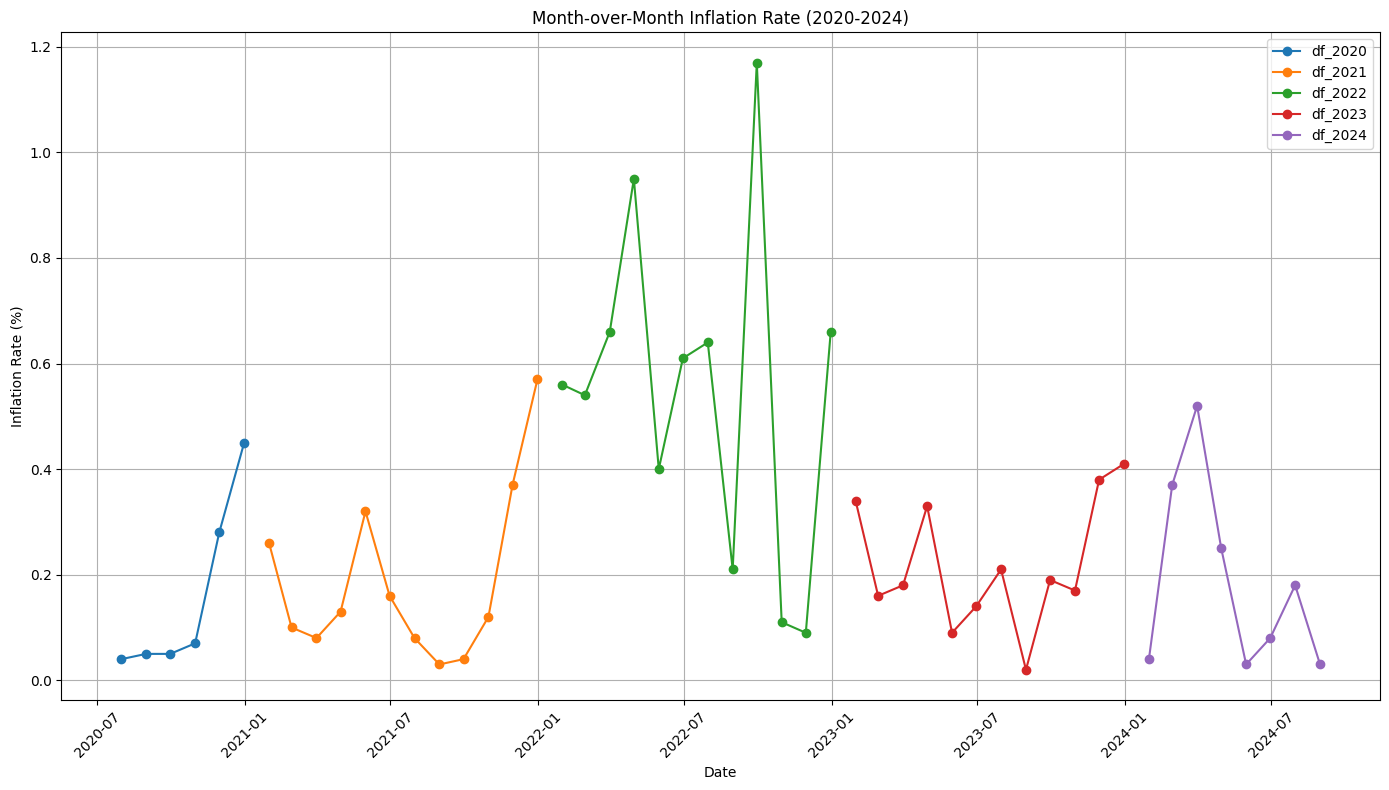

In [100]:
# Plotting
plt.figure(figsize=(14, 8))

for year, data in Inflation_Rate.items():
    plt.plot(data.index, data['inflation_mom'], marker='o', label=year)

plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Month-over-Month Inflation Rate (2020-2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [133]:
Inflation_Rate

{'df_2020':             inflation_mom  inflation_yoy
 period                                  
 2020-07-31           0.04           1.54
 2020-08-31           0.05           1.32
 2020-09-30           0.05           1.42
 2020-10-31           0.07           1.44
 2020-11-30           0.28           1.59
 2020-12-31           0.45           1.68,
 'df_2021':             inflation_mom  inflation_yoy
 period                                  
 2021-01-31           0.26           1.55
 2021-02-28           0.10           1.38
 2021-03-31           0.08           1.37
 2021-04-30           0.13           1.42
 2021-05-31           0.32           1.68
 2021-06-30           0.16           1.33
 2021-07-31           0.08           1.52
 2021-08-31           0.03           1.59
 2021-09-30           0.04           1.60
 2021-10-31           0.12           1.66
 2021-11-30           0.37           1.75
 2021-12-31           0.57           1.87,
 'df_2022':             inflation_mom  inflation_yoy

In [189]:

# Group by year and calculate summary statistics
df_grouped = df.groupby(df.index.year).agg(
    average_mom=('inflation_mom', 'mean'),
    max_mom=('inflation_mom', 'max'),
    min_mom=('inflation_mom', 'min'),
    median_mom=('inflation_mom', 'median')
)

# Display the table
print(df_grouped)

        average_mom  max_mom  min_mom  median_mom
period                                           
2020       0.156667     0.45     0.04       0.060
2021       0.188333     0.57     0.03       0.125
2022       0.550000     1.17     0.09       0.585
2023       0.218333     0.41     0.02       0.185
2024       0.187500     0.52     0.03       0.130


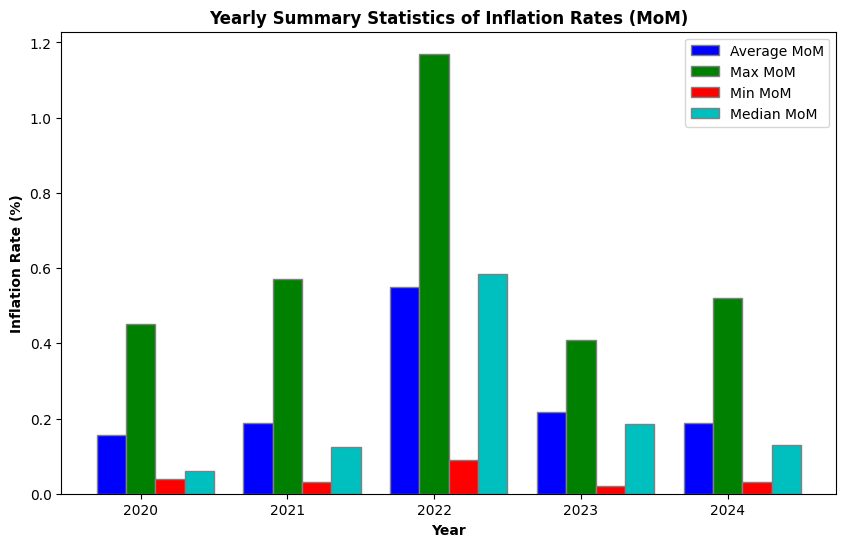

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.2

# Define the positions for each group of bars
r1 = np.arange(len(df_grouped))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting each statistic as a group of bars
plt.bar(r1, df_grouped['average_mom'], color='b', width=bar_width, edgecolor='grey', label='Average MoM')
plt.bar(r2, df_grouped['max_mom'], color='g', width=bar_width, edgecolor='grey', label='Max MoM')
plt.bar(r3, df_grouped['min_mom'], color='r', width=bar_width, edgecolor='grey', label='Min MoM')
plt.bar(r4, df_grouped['median_mom'], color='c', width=bar_width, edgecolor='grey', label='Median MoM')

# Adding labels
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Inflation Rate (%)', fontweight='bold')
plt.title('Yearly Summary Statistics of Inflation Rates (MoM)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df_grouped))], df_grouped.index)

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [193]:
# Group by year and calculate summary statistics
df_grouped_year = df.groupby(df.index.year).agg(
    average_yoy=('inflation_yoy', 'mean'),
    max_yoy=('inflation_yoy', 'max'),
    min_yoy=('inflation_yoy', 'min'),
    median_yoy=('inflation_yoy', 'median')
)

# Display the table
print(df_grouped_year)

        average_yoy  max_yoy  min_yoy  median_yoy
period                                           
2020       1.498333     1.68     1.32       1.490
2021       1.560000     1.87     1.33       1.570
2022       4.205833     5.95     2.06       4.520
2023       3.685833     5.47     2.28       3.395
2024       2.621250     3.05     2.12       2.660


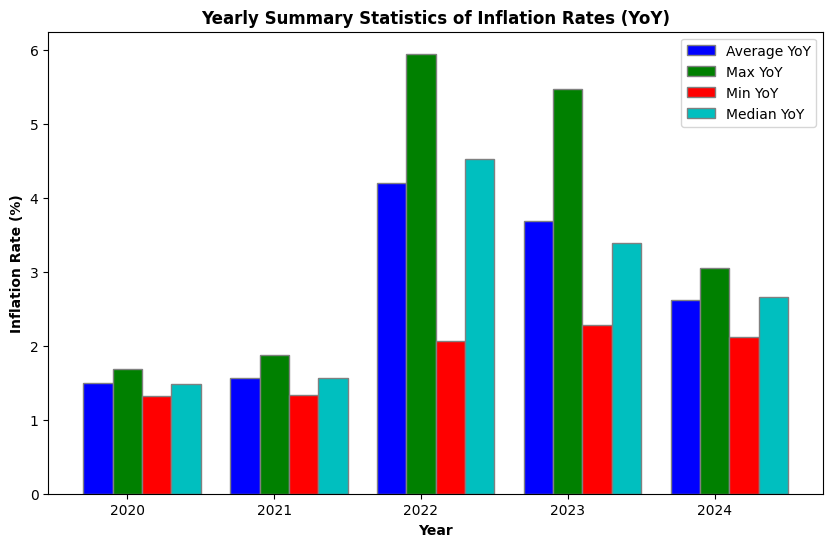

In [195]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.2

# Define the positions for each group of bars
r1 = np.arange(len(df_grouped_year))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting each statistic as a group of bars
plt.bar(r1, df_grouped_year['average_yoy'], color='b', width=bar_width, edgecolor='grey', label='Average YoY')
plt.bar(r2, df_grouped_year['max_yoy'], color='g', width=bar_width, edgecolor='grey', label='Max YoY')
plt.bar(r3, df_grouped_year['min_yoy'], color='r', width=bar_width, edgecolor='grey', label='Min YoY')
plt.bar(r4, df_grouped_year['median_yoy'], color='c', width=bar_width, edgecolor='grey', label='Median YoY')

# Adding labels
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Inflation Rate (%)', fontweight='bold')
plt.title('Yearly Summary Statistics of Inflation Rates (YoY)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df_grouped))], df_grouped.index)

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [199]:
# Combine the two DataFrames into one
df_combined = pd.concat([df_grouped, df_grouped_year], axis=1)

# Display the combined DataFrame
print(df_combined)

        average_mom  max_mom  min_mom  median_mom  average_yoy  max_yoy  \
period                                                                    
2020       0.156667     0.45     0.04       0.060     1.498333     1.68   
2021       0.188333     0.57     0.03       0.125     1.560000     1.87   
2022       0.550000     1.17     0.09       0.585     4.205833     5.95   
2023       0.218333     0.41     0.02       0.185     3.685833     5.47   
2024       0.187500     0.52     0.03       0.130     2.621250     3.05   

        min_yoy  median_yoy  
period                       
2020       1.32       1.490  
2021       1.33       1.570  
2022       2.06       4.520  
2023       2.28       3.395  
2024       2.12       2.660  


In [200]:
# Transpose the DataFrame to switch rows and columns
df_transposed = df_combined.T

# Display the transposed DataFrame
print(df_transposed)

period           2020      2021      2022      2023     2024
average_mom  0.156667  0.188333  0.550000  0.218333  0.18750
max_mom      0.450000  0.570000  1.170000  0.410000  0.52000
min_mom      0.040000  0.030000  0.090000  0.020000  0.03000
median_mom   0.060000  0.125000  0.585000  0.185000  0.13000
average_yoy  1.498333  1.560000  4.205833  3.685833  2.62125
max_yoy      1.680000  1.870000  5.950000  5.470000  3.05000
min_yoy      1.320000  1.330000  2.060000  2.280000  2.12000
median_yoy   1.490000  1.570000  4.520000  3.395000  2.66000


In [214]:
# Find the month and year with the highest and lowest inflation for MoM
highest_mom = df.loc[df['inflation_mom'].idxmax()]
lowest_mom = df.loc[df['inflation_mom'].idxmin()]

print(f"Highest MoM inflation: {highest_mom['inflation_mom']} in {highest_mom.name}")
print(f"Lowest MoM inflation: {lowest_mom['inflation_mom']} in {lowest_mom.name}")

# Find the month and year with the highest and lowest inflation for YoY
highest_yoy = df.loc[df['inflation_yoy'].idxmax()]
lowest_yoy = df.loc[df['inflation_yoy'].idxmin()]

print(f"Highest YoY inflation: {highest_yoy['inflation_yoy']} in {highest_yoy.name}")
print(f"Lowest YoY inflation: {lowest_yoy['inflation_yoy']} in {lowest_yoy.name}")


Highest MoM inflation: 1.17 in 2022-09-30 00:00:00
Lowest MoM inflation: 0.02 in 2023-08-31 00:00:00
Highest YoY inflation: 5.95 in 2022-09-30 00:00:00
Lowest YoY inflation: 1.32 in 2020-08-31 00:00:00


#Analysis

**Month with the Highest Inflation:**

* MoM (Month-over-Month):
The highest MoM inflation rate is 1.17% in September 2022.

* YoY (Year-over-Year):
The highest YoY inflation rate is 5.95% in September 2022.

**Month with the Lowest Inflation:**

* MoM (Month-over-Month):
The lowest MoM inflation rate is 0.02% in August 2023.

* YoY (Year-over-Year):
The lowest YoY inflation rate is 1.32% in August 2020.

### Conclusion of Inflation Trends (July 2020 - August 2024)

The analysis of inflation data from July 2020 to August 2024 reveals significant fluctuations in both month-over-month (MoM) and year-over-year (YoY) inflation rates, highlighting key periods of inflationary pressure and stability.

1. **Highest Inflation Period:**
   - The **highest inflation** rates, both MoM and YoY, occurred in **September 2022**. 
   - This suggests a period of sharp price increases, likely driven by policy changes(the authorities partially removed caps on Fuel Prices in Sept 2022) that heightened inflationary pressures. Resulting in a 30% increase in gasoline prices.This led to the highest inflation level. The simultaneous peak in both MoM and YoY indicates that this was not just a short-term spike but part of a broader trend of rising prices throughout 2022.

2. **Lowest Inflation Period:**
   - The **lowest MoM inflation** was recorded in **August 2023**, while the **lowest YoY inflation** occurred in **August 2020**.
   - The low MoM rate in August 2023 suggests a temporary period of price stability or reduction, potentially due to reduced demand, seasonal factors, or effective monetary policies. Meanwhile, the low YoY rate in August 2020 reflects a relatively stable pricing environment during the early part of the analyzed period, which may have been influenced by pandemic-related economic conditions, including reduced consumption and supply constraints.

3. **Overall Trends:**
   - The year **2022** showed the most significant inflationary pressure, both on a MoM and YoY basis, indicating an overall upward trend in inflation during that period. This is indicative of a challenging economic environment characterized by consistent price increases across multiple months.
   - By contrast, the years **2020** and **2021** reflect more moderate inflation trends, with relatively lower fluctuations, suggesting a period of economic stabilization following the initial shocks of the pandemic.

4. **Comparative Insights:**
   - **YoY inflation** generally shows more sustained periods of increase and decrease compared to **MoM inflation**, which tends to capture more short-term volatility. This suggests that while there are temporary fluctuations in inflation rates from month to month, the longer-term trend over the years shows a more consistent pattern of change.

### Implications

Understanding these inflation trends is crucial for policymakers, businesses, and consumers. The identification of periods with high inflationary pressure can help in planning for economic resilience, while recognizing periods of low inflation can provide opportunities for investment and spending. Furthermore, the data underscores the importance of closely monitoring both short-term (MoM) and long-term (YoY) inflation metrics to gain a comprehensive understanding of the economic landscape.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.